<a href="https://colab.research.google.com/github/MuhammadIrsyadDany/MachineLearning_2024/blob/main/Pertemuan%208%20-%20UTS/2241720227_Muhammad%20Irsyad%20Dany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET

In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashwingupta3012/human-faces")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/human-faces/versions/1


# Proses Pemrosesan dataset gambar dan persiapan data

In [43]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path ke folder dataset
dataset_path = '/root/.cache/kagglehub/datasets/ashwingupta3012/human-faces/versions/1'

# Fungsi untuk memuat gambar dari folder (termasuk subfolder)
def load_images(dataset_path, image_size=(64, 64)):
    images = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')  # Ekstensi gambar yang valid

    # Menelusuri folder dan subfolder
    for root, _, files in os.walk(dataset_path):
        for img_name in files:
            if not img_name.lower().endswith(valid_extensions):
                print(f"Skip file: {img_name}")
                continue

            img_path = os.path.join(root, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Baca sebagai grayscale

            if img is None:
                print(f"Gagal memuat gambar: {img_name}")
                continue  # Skip jika gambar tidak valid

            img = cv2.resize(img, image_size)  # Resize gambar
            img = img.flatten()  # Konversi gambar menjadi vektor
            images.append(img)

    return np.array(images)

# Muat semua gambar dari folder dan subfolder
X = load_images(dataset_path)

# Pastikan data tidak kosong sebelum split
if X.size == 0:
    raise ValueError("Tidak ada gambar yang berhasil dimuat. Pastikan dataset berisi gambar yang valid.")

# Split data menjadi train dan test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"Jumlah data train: {len(X_train)}, Jumlah data test: {len(X_test)}")


Jumlah data train: 5775, Jumlah data test: 1444


Kode Diatas digunakan dalam tugas machine learning atau computer vision.

1. **Membaca dan Memuat Gambar dari Dataset**
Fungsi load_images() digunakan untuk:
*   Menelusuri folder dan subfolder untuk mencari gambar dengan format tertentu (misalnya, .jpg, .jpeg, .png, .bmp).
*   Membaca gambar menggunakan OpenCV dalam mode grayscale.
*   Melakukan resize gambar ke ukuran 64x64 piksel.
*   Mengubah gambar menjadi vektor datar (flatten) agar lebih mudah digunakan dalam model ML.
*   Menangani kasus kesalahan, seperti gambar yang tidak valid, dengan melewati gambar yang tidak bisa dibaca.


2. **Menyiapkan Data untuk Machine Learning**
*   Dataset yang sudah berhasil dimuat disimpan ke dalam array NumPy.
*   Jika tidak ada gambar yang berhasil dimuat, kode akan menghasilkan error (ValueError).

3. **Membagi Data Menjadi Train dan Test Sets**
*   Fungsi train_test_split() dari Scikit-Learn membagi dataset menjadi 80% data train dan 20% data test.
*   Data train digunakan untuk melatih model.
*   Data test digunakan untuk menguji performa model.

Kegunaan Kode Ini:


*   Pengolahan dataset gambar: Memastikan dataset dalam format yang dapat diproses oleh model machine learning.
*   Training dan evaluasi model: Dengan membagi data menjadi train dan test, model bisa dievaluasi dengan benar.
*   Contoh Penerapan : Digunakan dalam tugas seperti klasifikasi wajah, deteksi objek, atau identifikasi gambar.
















# Proses Klasterisasi dan Visualisasi Data menggunakan algoritma K-Means Clustering serta reduksi dimensi dengan PCA (Principal Component Analysis).

Silhouette Score untuk 5 cluster: 0.08430347840468456


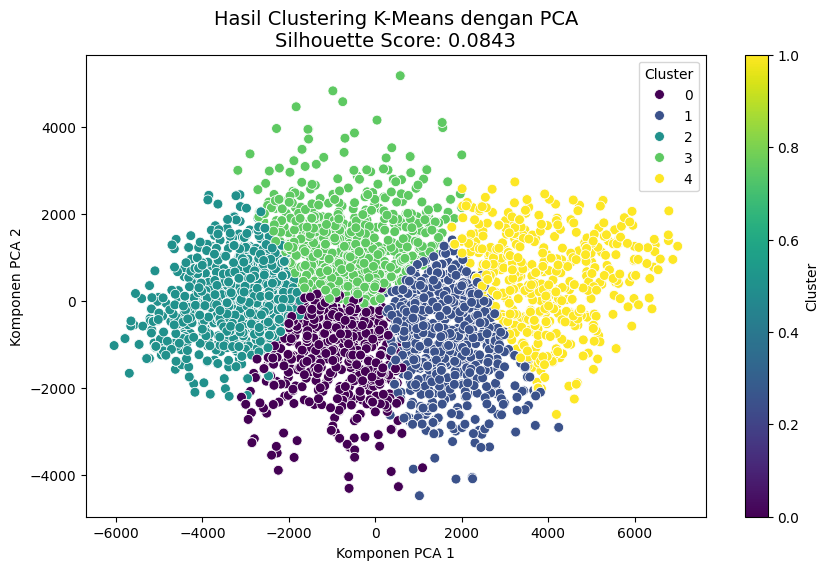

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan jumlah cluster
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Latih model KMeans
kmeans.fit(X_train)

# Prediksi kluster dari data training
y_kmeans = kmeans.predict(X_train)

# Hitung Silhouette Score
sil_score = silhouette_score(X_train, y_kmeans)
print(f'Silhouette Score untuk {n_clusters} cluster: {sil_score}')

# Reduksi dimensi menggunakan PCA menjadi 2 komponen untuk visualisasi
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Buat DataFrame untuk visualisasi dengan komponen PCA dan cluster
import pandas as pd
df = pd.DataFrame(X_train_pca, columns=['Komponen PCA 1', 'Komponen PCA 2'])
df['Cluster'] = y_kmeans

# Plot hasil clustering dengan scatter plot
plt.figure(figsize=(10, 6))
# Assign the scatterplot to a variable
scatter = sns.scatterplot(data=df, x='Komponen PCA 1', y='Komponen PCA 2', hue='Cluster', palette='viridis', s=50)

# Tambahkan judul dan tampilan Silhouette Score di atas plot
plt.title(f'Hasil Clustering K-Means dengan PCA\nSilhouette Score: {sil_score:.4f}', fontsize=14)
# Use the scatterplot variable for the colorbar
plt.colorbar(scatter.collections[0], label='Cluster')
plt.show()

## Proses dan Tujuan Kode:

1.   **K-Means Clustering:**

*   K-Means adalah algoritma unsupervised learning yang membagi data ke dalam sejumlah cluster yang telah ditentukan.
*   Dalam kode ini:
-   Model K-Means dilatih menggunakan data X_train dengan jumlah cluster sebanyak 5 (n_clusters=5).
-   Setiap data di-assign ke cluster tertentu berdasarkan kedekatan dengan pusat cluster.


2. **Menghitung Silhouette Score:**

*   Silhouette Score mengukur kualitas klasterisasi, yaitu seberapa baik data dalam sebuah cluster mirip dengan data di cluster yang sama, dan seberapa jauh dari cluster lain.
*   Nilai Silhouette Score berkisar antara -1 hingga 1. Semakin mendekati 1, semakin baik pemisahan antar cluster.



3. **Reduksi Dimensi dengan PCA (Principal Component Analysis):**

*   PCA digunakan untuk mereduksi dimensi data, dari banyak fitur menjadi hanya 2 komponen utama, sehingga data bisa divisualisasikan dalam scatter plot.
*   Meskipun data asli memiliki lebih banyak dimensi (sesuai dengan hasil flatten gambar sebelumnya), dengan PCA, kode ini mengubah data ke 2D agar mudah divisualisasikan.



4. **Visualisasi Hasil Clustering:**

*   Menggunakan Seaborn dan Matplotlib, kode ini membuat scatter plot dengan komponen PCA sebagai sumbu X dan Y.
*   Setiap titik dalam plot mewakili data, dan warna menunjukkan cluster yang dihasilkan oleh K-Means.
*   Ditambahkan colorbar untuk memperjelas kluster dan judul plot menampilkan Silhouette Score sebagai indikasi kualitas klasterisasi.

Kegunaan dan Tujuan Kode Ini:

*   Klasterisasi Data: Membagi data menjadi beberapa kelompok (cluster) berdasarkan kemiripan fitur.
*   Evaluasi Kualitas Klasterisasi: Menggunakan Silhouette Score untuk menilai seberapa baik data dikelompokkan.
*   Visualisasi Cluster: Dengan PCA, data direduksi menjadi 2 dimensi untuk memudahkan interpretasi dan melihat pola kluster secara visual.


Contoh Penerapan:

*   Segmentasi Pelanggan: Kelompokkan pelanggan berdasarkan perilaku atau pola pembelian.
*   Clustering Wajah: Mengelompokkan gambar wajah yang mirip.
*   Pencarian Pola Data: Mencari pola tersembunyi dalam dataset besar yang tidak memiliki label.

Secara keseluruhan, kode ini memproses data untuk klasterisasi dan reduksi dimensi guna membantu analisis lebih lanjut atau visualisasi pola dalam data.









# **Proses Pelatihan, Evaluasi, dan Visualisasi Model klasifikasi menggunakan Support Vector Machine (SVM).**

Confusion Matrix:
[[59 46 41 74 60]
 [61 65 45 82 75]
 [51 48 43 67 54]
 [55 45 52 65 62]
 [63 56 51 75 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.21      0.21       280
           1       0.25      0.20      0.22       328
           2       0.19      0.16      0.17       263
           3       0.18      0.23      0.20       279
           4       0.16      0.17      0.16       294

    accuracy                           0.19      1444
   macro avg       0.20      0.19      0.19      1444
weighted avg       0.20      0.19      0.19      1444



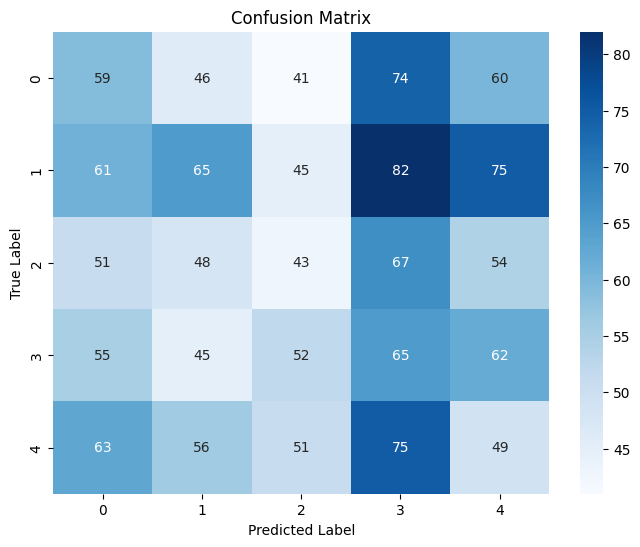

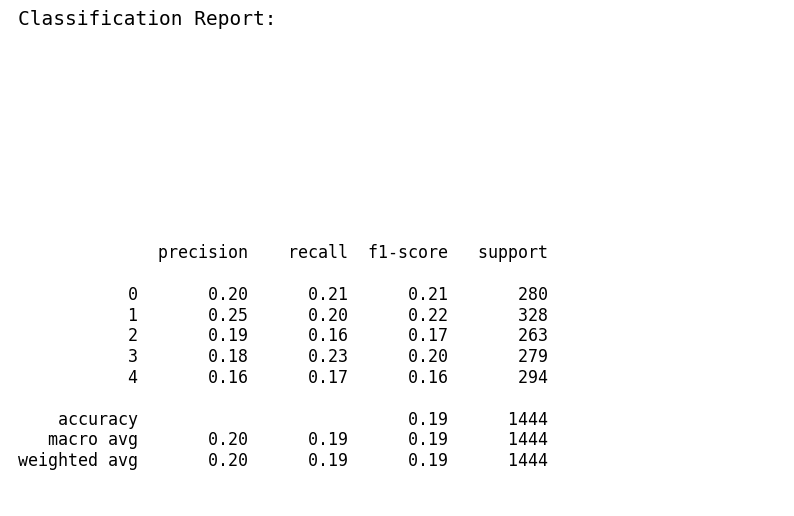

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
y_train = np.random.randint(0, 5, size=(X_train.shape[0],))  # 5 kelas
y_test = np.random.randint(0, 5, size=(X_test.shape[0],))     # 5 kelas

# Inisialisasi dan latih model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred = svm_model.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Generate classification report
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n', report)

# Visualisasi Confusion Matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tampilkan classification report di atas plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.text(0.01, 1.25, str('Classification Report:'), {'fontsize': 14}, fontproperties='monospace')  # Heading
plt.text(0.01, 0.05, str(report), {'fontsize': 12}, fontproperties='monospace')  # Content
plt.axis('off')  # Hapus axis untuk tampilan rapi
plt.show()


## Proses dan Tahapan Kode:

1.   **Persiapan Data Label (Target):**


*   y_train dan y_test dihasilkan secara acak dengan 5 kelas berbeda (np.random.randint(0, 5)).
*   Ini menandakan bahwa klasifikasi dilakukan pada multi-class problem, dengan kelas yang mungkin bernilai antara 0 hingga 4.


2.   **Pelatihan Model Support Vector Machine (SVM):**

*   Model SVC (Support Vector Classifier) dari Scikit-Learn digunakan untuk melakukan klasifikasi.
*   svm_model.fit(X_train, y_train) melatih model menggunakan data latih dan label target.


3. **Prediksi Data Uji:**

*   svm_model.predict(X_test) memprediksi label untuk data uji berdasarkan model yang telah dilatih.


4. **Evaluasi Model dengan Confusion Matrix dan Classification Report:**

*   Confusion Matrix: Matriks ini menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
*   List item


5. **Visualisasi Confusion Matrix sebagai Heatmap:**

*   Menggunakan Seaborn untuk membuat heatmap dari confusion matrix, membantu melihat performa klasifikasi secara visual.
*   Heatmap menampilkan intensitas warna untuk setiap sel matriks, memudahkan interpretasi.


6. **Tampilan Classification Report di Plot:**

*   Menggunakan Matplotlib, classification report ditampilkan dalam bentuk teks di atas plot agar mudah dibaca.

Kegunaan dan Tujuan Kode Ini:
1. **Pelatihan Model Klasifikasi:**

*   Model SVM dilatih untuk memprediksi kelas target dari data gambar.

2. **Evaluasi Model dengan Metrik Klasifikasi:**

*   Confusion Matrix dan Classification Report membantu mengidentifikasi seberapa baik model memprediksi data uji untuk setiap kelas.

3. **Visualisasi Kinerja Model:**

*   Dengan heatmap dari confusion matrix, lebih mudah memahami kesalahan prediksi dan distribusi prediksi untuk setiap kelas.

Contoh Penerapan:

*   Klasifikasi Gambar: Memprediksi kategori gambar seperti wajah, objek, atau digit angka.
*   Pengenalan Pola: Menerapkan model pada tugas-tugas seperti klasifikasi teks, suara, atau data sensor.
*   Model Diagnosis: Dengan confusion matrix dan classification report, pengembang dapat melihat kelemahan model dan memperbaikinya.

Secara keseluruhan, kode ini menunjukkan proses pelatihan, prediksi, evaluasi, dan visualisasi model klasifikasi dengan menggunakan SVM.








